<a href="https://colab.research.google.com/github/Aakanksha0511/SelfProjects/blob/main/MLAdultcensusincome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 3.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
!pip install dexplot
import dexplot as dxp

     |████████████████████████████████| 173 kB 5.0 MB/s 


In [ ]:
data=pd.read_csv("/content/adult.csv")

In [ ]:
data.head()

age workclass  fnlwgt  ... hours.per.week  native.country income
0   90         ?   77053  ...             40   United-States  <=50K
1   82   Private  132870  ...             18   United-States  <=50K
2   66         ?  186061  ...             40   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K

[5 rows x 15 columns]

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.columns=["Age","Owner_Type","Id","Education","No_projects","Marital_Status","Designation","Family_Relation","Race","Gender","Capital_Gain","Capital_Loss","Working_hours","Country","Salary"]

In [ ]:
data.head()

Age Owner_Type      Id  ... Working_hours        Country Salary
0   90          ?   77053  ...            40  United-States  <=50K
1   82    Private  132870  ...            18  United-States  <=50K
2   66          ?  186061  ...            40  United-States  <=50K
3   54    Private  140359  ...            40  United-States  <=50K
4   41    Private  264663  ...            40  United-States  <=50K

[5 rows x 15 columns]

In [ ]:
data.shape

(32561, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Owner_Type       32561 non-null  object
 2   Id               32561 non-null  int64 
 3   Education        32561 non-null  object
 4   No_projects      32561 non-null  int64 
 5   Marital_Status   32561 non-null  object
 6   Designation      32561 non-null  object
 7   Family_Relation  32561 non-null  object
 8   Race             32561 non-null  object
 9   Gender           32561 non-null  object
 10  Capital_Gain     32561 non-null  int64 
 11  Capital_Loss     32561 non-null  int64 
 12  Working_hours    32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Salary           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.describe()

Age            Id  ...  Capital_Loss  Working_hours
count  32561.000000  3.256100e+04  ...  32561.000000   32561.000000
mean      38.581647  1.897784e+05  ...     87.303830      40.437456
std       13.640433  1.055500e+05  ...    402.960219      12.347429
min       17.000000  1.228500e+04  ...      0.000000       1.000000
25%       28.000000  1.178270e+05  ...      0.000000      40.000000
50%       37.000000  1.783560e+05  ...      0.000000      40.000000
75%       48.000000  2.370510e+05  ...      0.000000      45.000000
max       90.000000  1.484705e+06  ...   4356.000000      99.000000

[8 rows x 6 columns]

In [ ]:
labels=data["Owner_Type"].value_counts().index
values=data["Owner_Type"].value_counts().values
colors=data["Owner_Type"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [ ]:
labels=data["Age"].value_counts()[:10].index
values=data["Age"].value_counts()[:10].values
colors=data["Age"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [ ]:
labels=data["Education"].value_counts().index
values=data["Education"].value_counts().values
color=data["Education"]

fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [ ]:
labels = data['No_projects'].value_counts().index
values = data['No_projects'].value_counts().values
colors = data['No_projects']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Marital_Status'].value_counts().index
values = data['Marital_Status'].value_counts().values
colors = data['Marital_Status']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Designation'].value_counts().index
values = data['Designation'].value_counts().values
colors = data['Designation']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Family_Relation'].value_counts().index
values = data['Family_Relation'].value_counts().values
colors = data['Family_Relation']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Race'].value_counts().index
values = data['Race'].value_counts().values
colors = ['#98adbf','#1d4466','#2678bf','#2c6699']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Gender'].value_counts().index
values = data['Gender'].value_counts().values
colors = data["Gender"]
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Country'].value_counts().index
values = data['Country'].value_counts().values
colors = data['Country']
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

In [ ]:
labels = data['Salary'].value_counts().index
values = data['Salary'].value_counts().values
colors = data["Salary"]
fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",marker = dict(colors=colors))])
fig.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


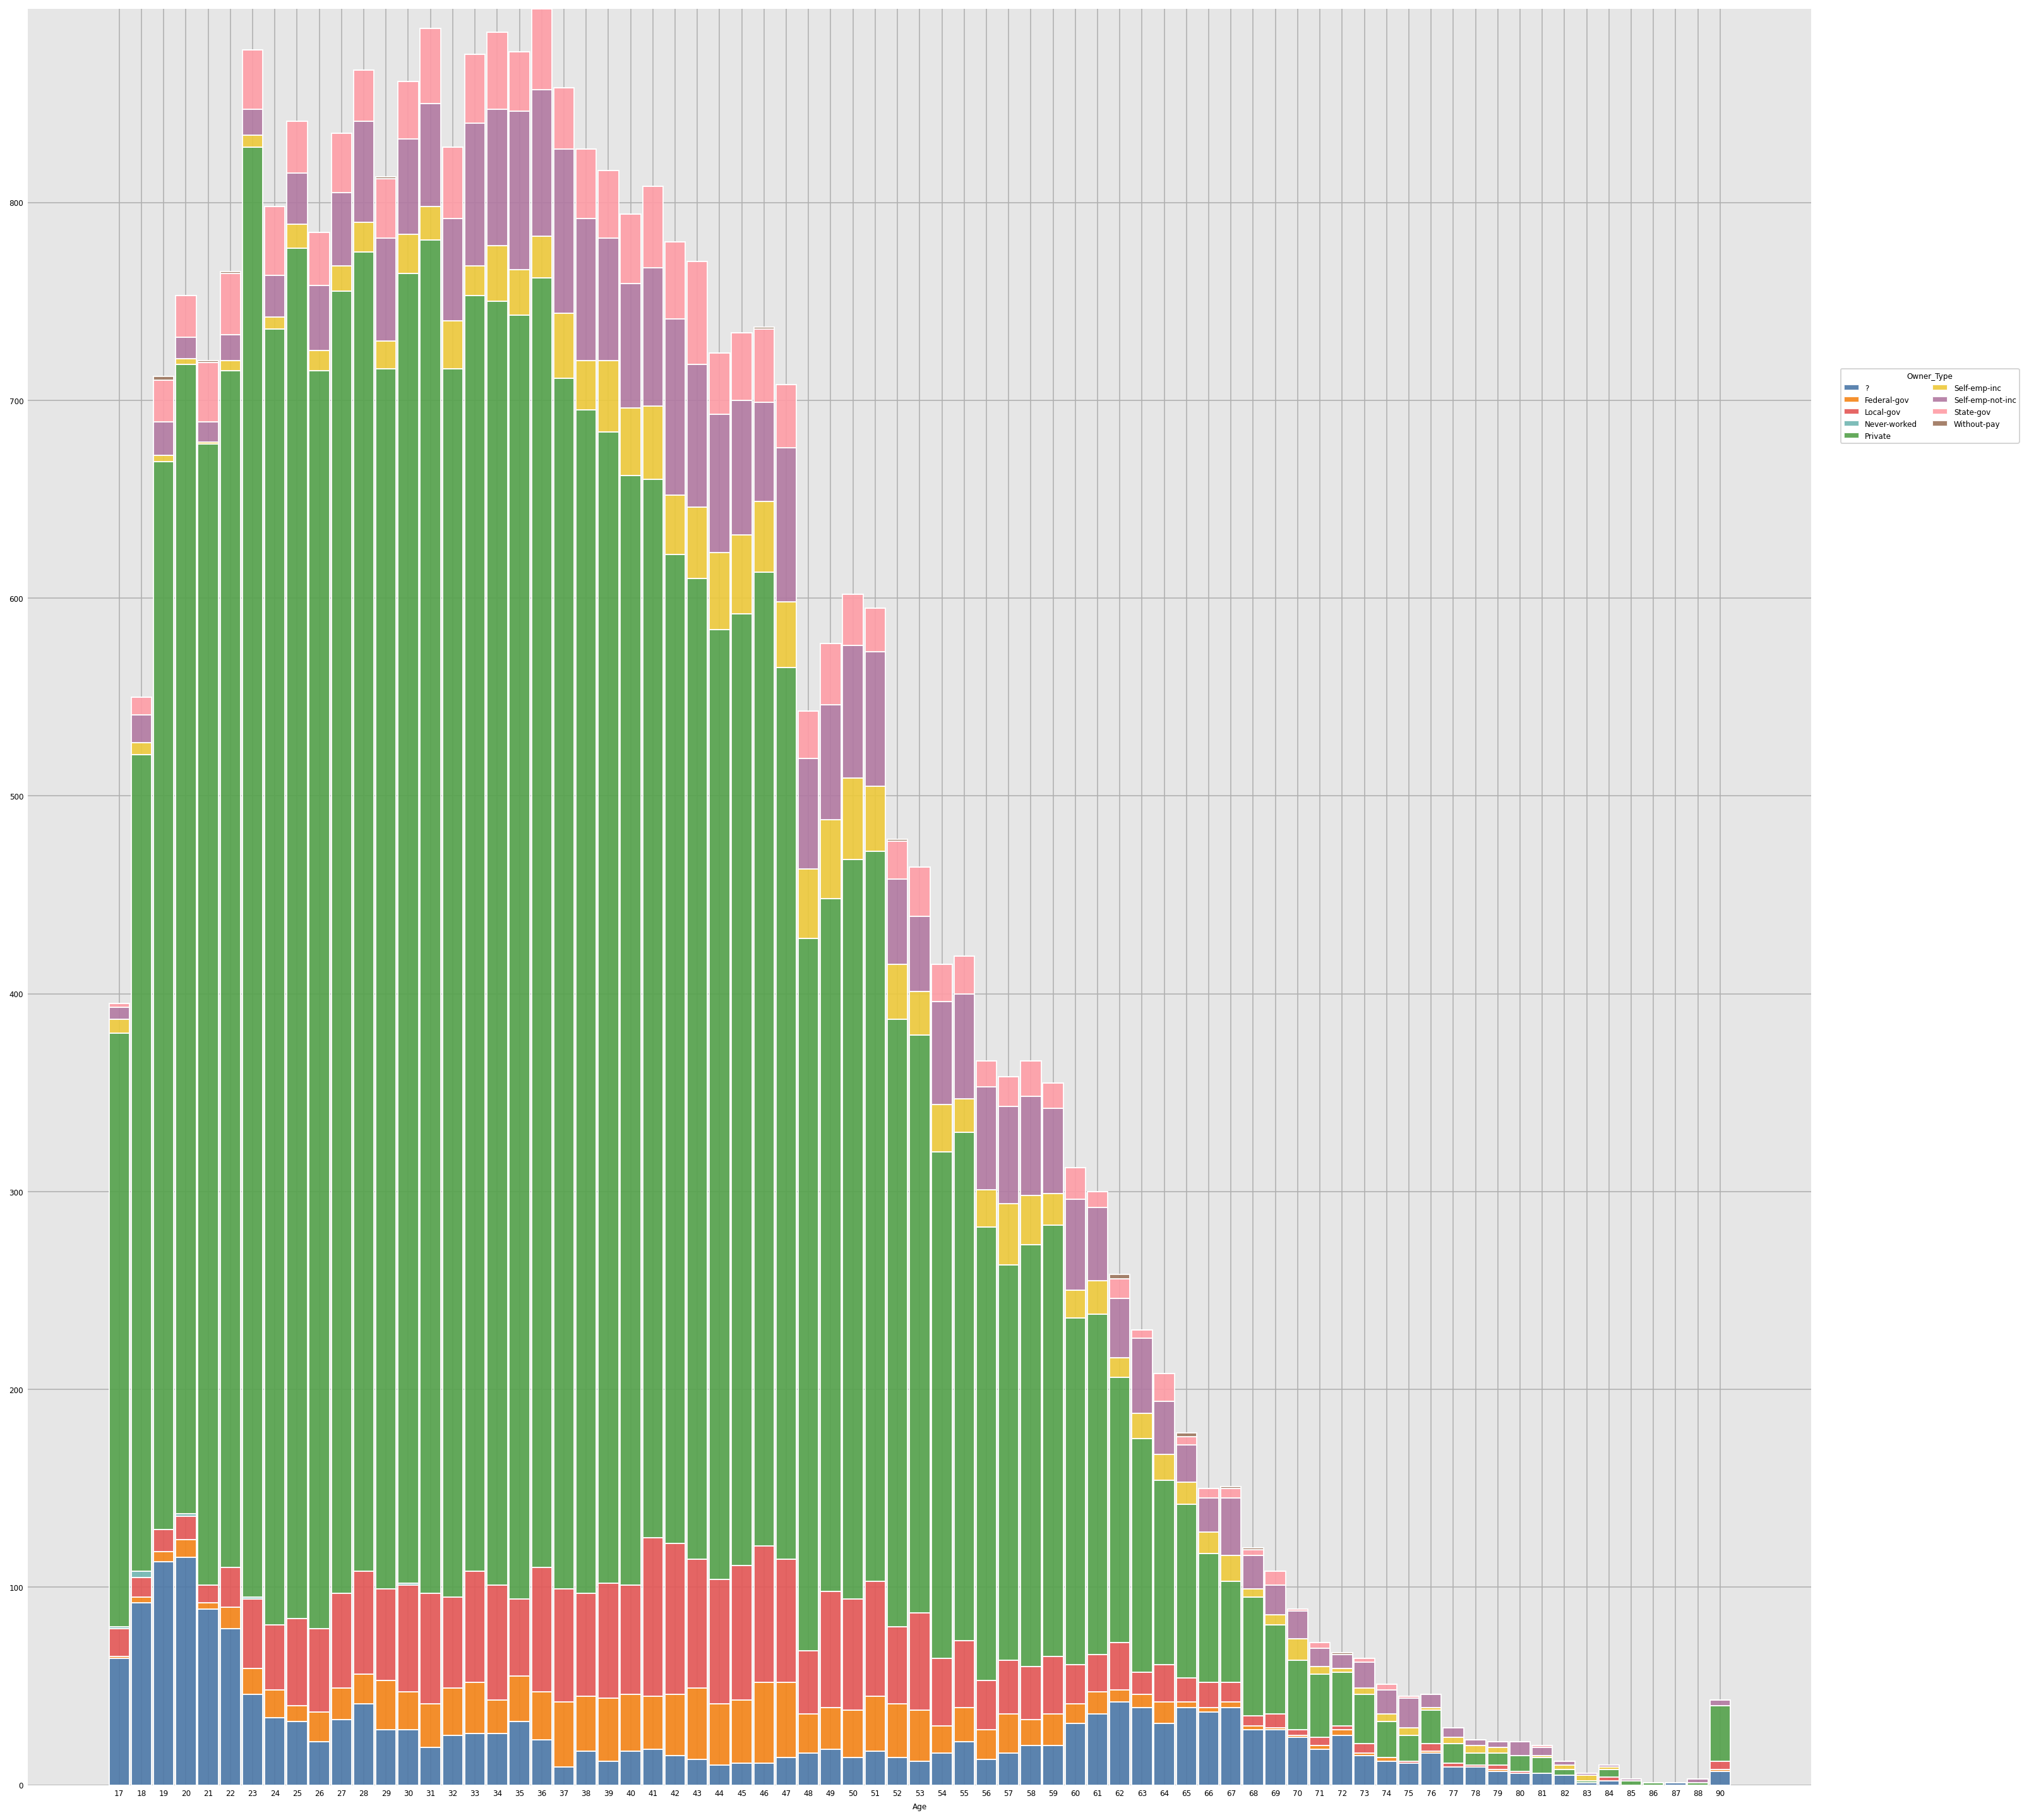

In [ ]:
dxp.count(val="Age",data = data,split="Owner_Type",stacked = True,figsize=(20,20),xlabel = "Age of the Working Class People")

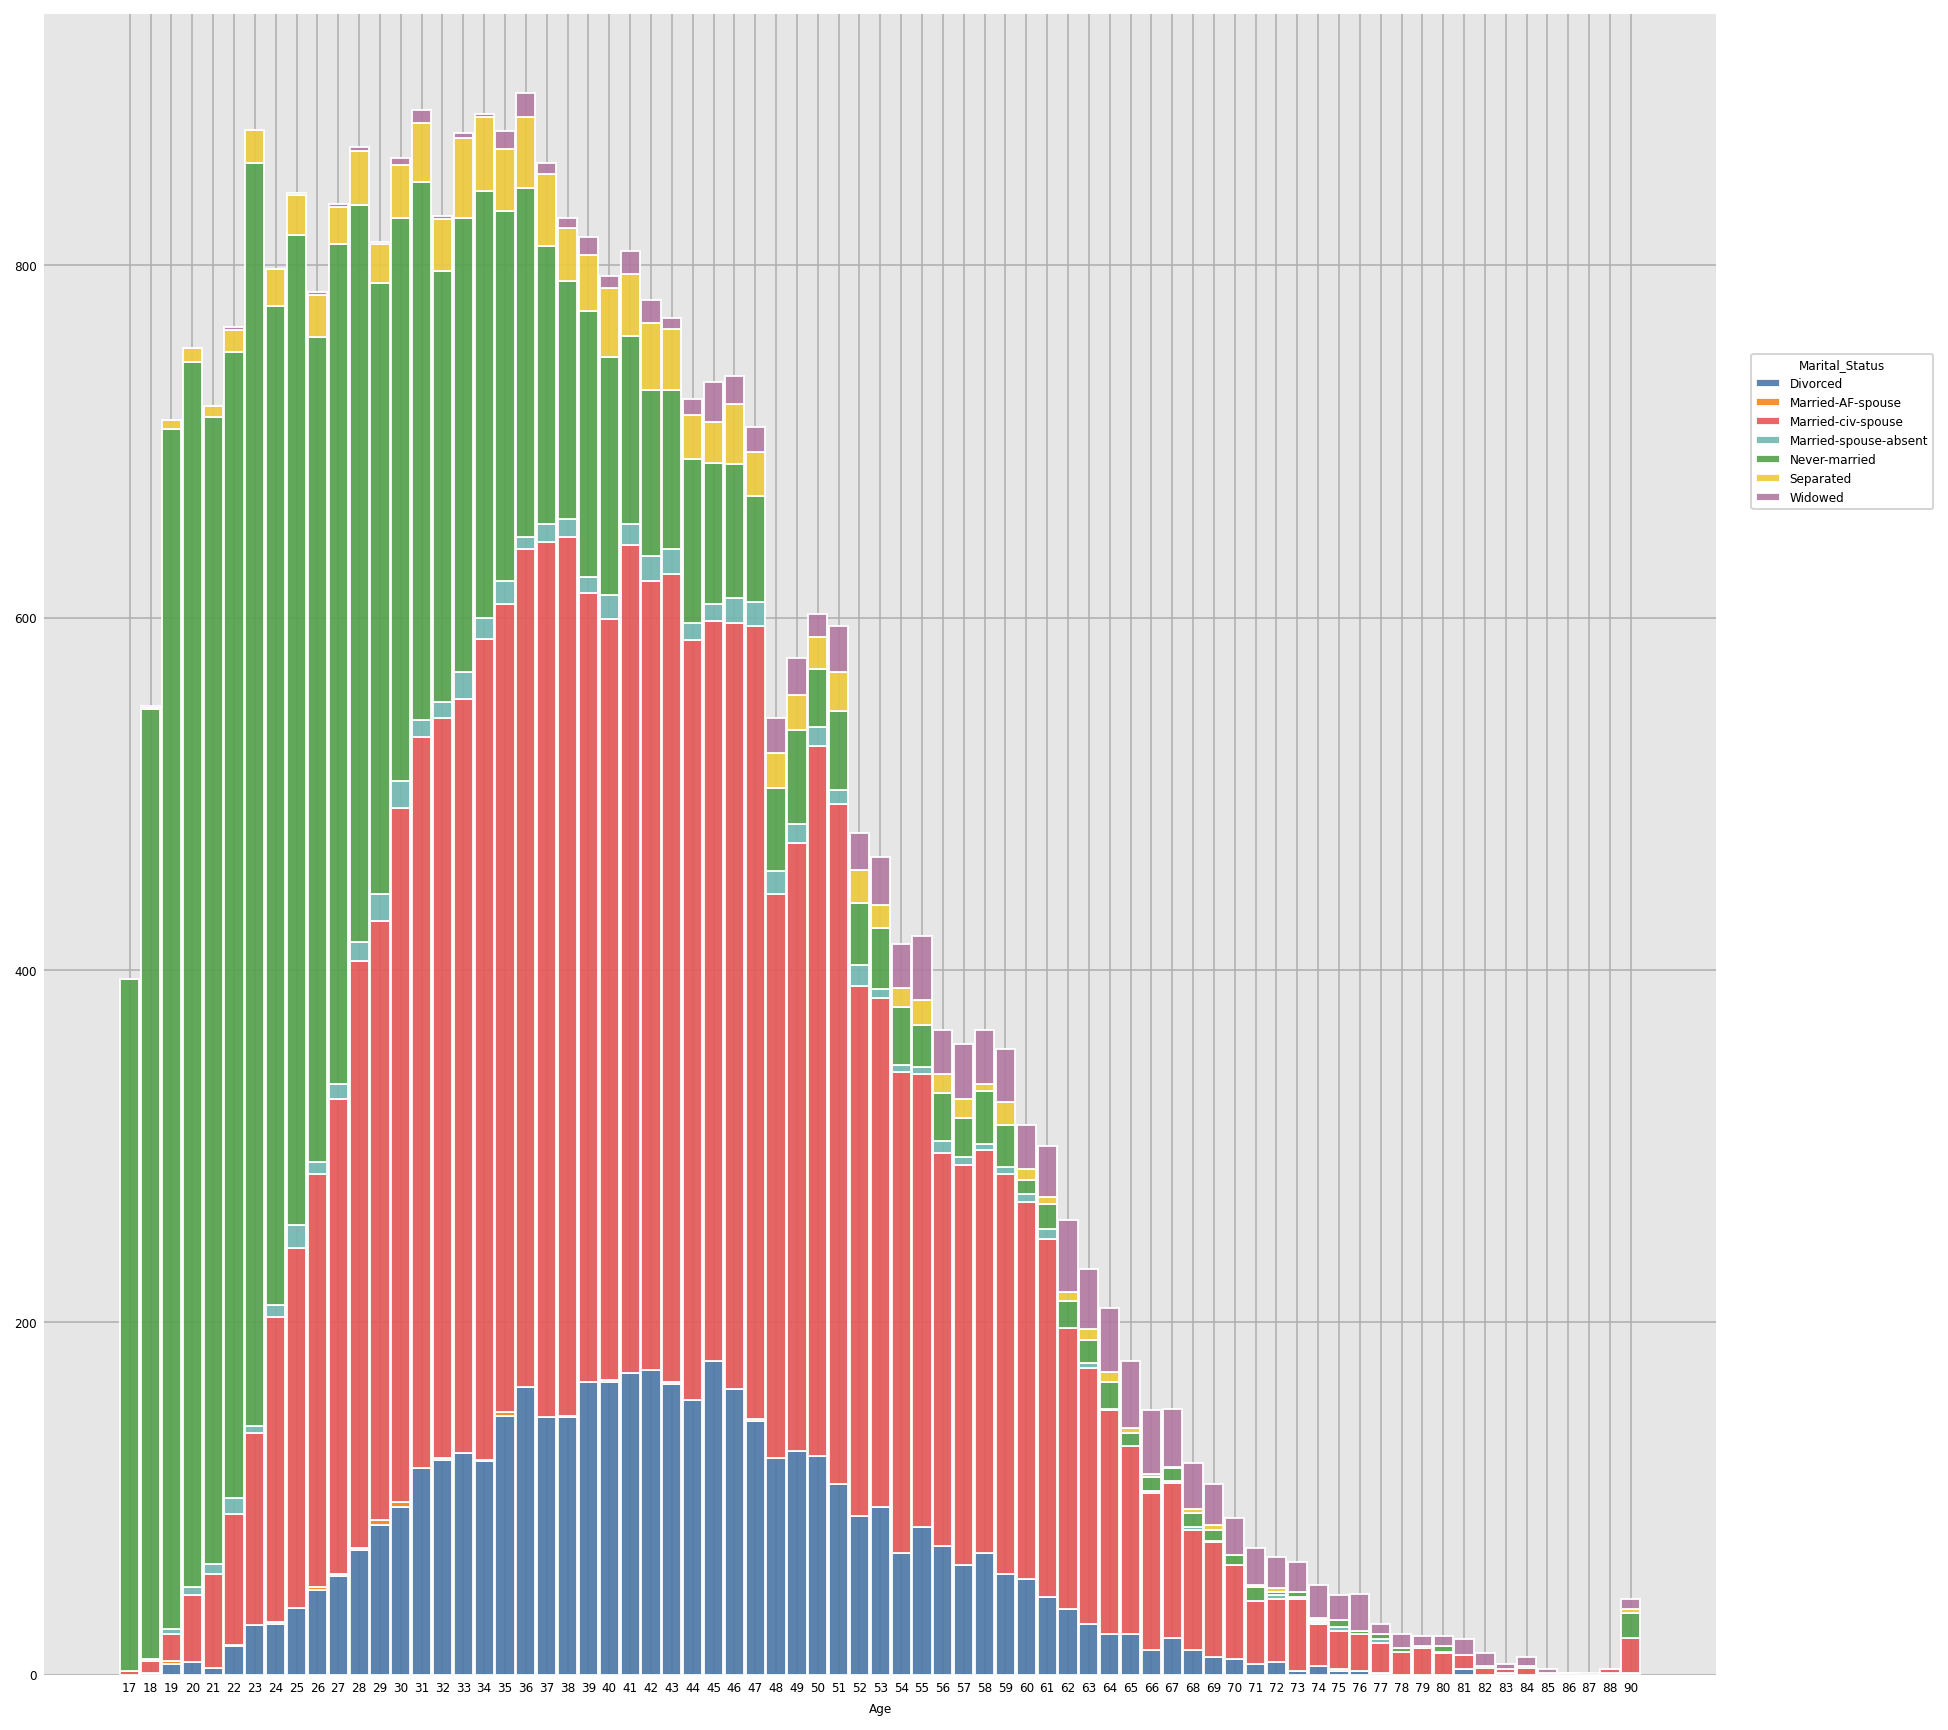

In [ ]:
dxp.count(val="Age",data = data,split="Marital_Status",stacked = True,figsize=(12,12),xlabel = "Age of the Working Class People")

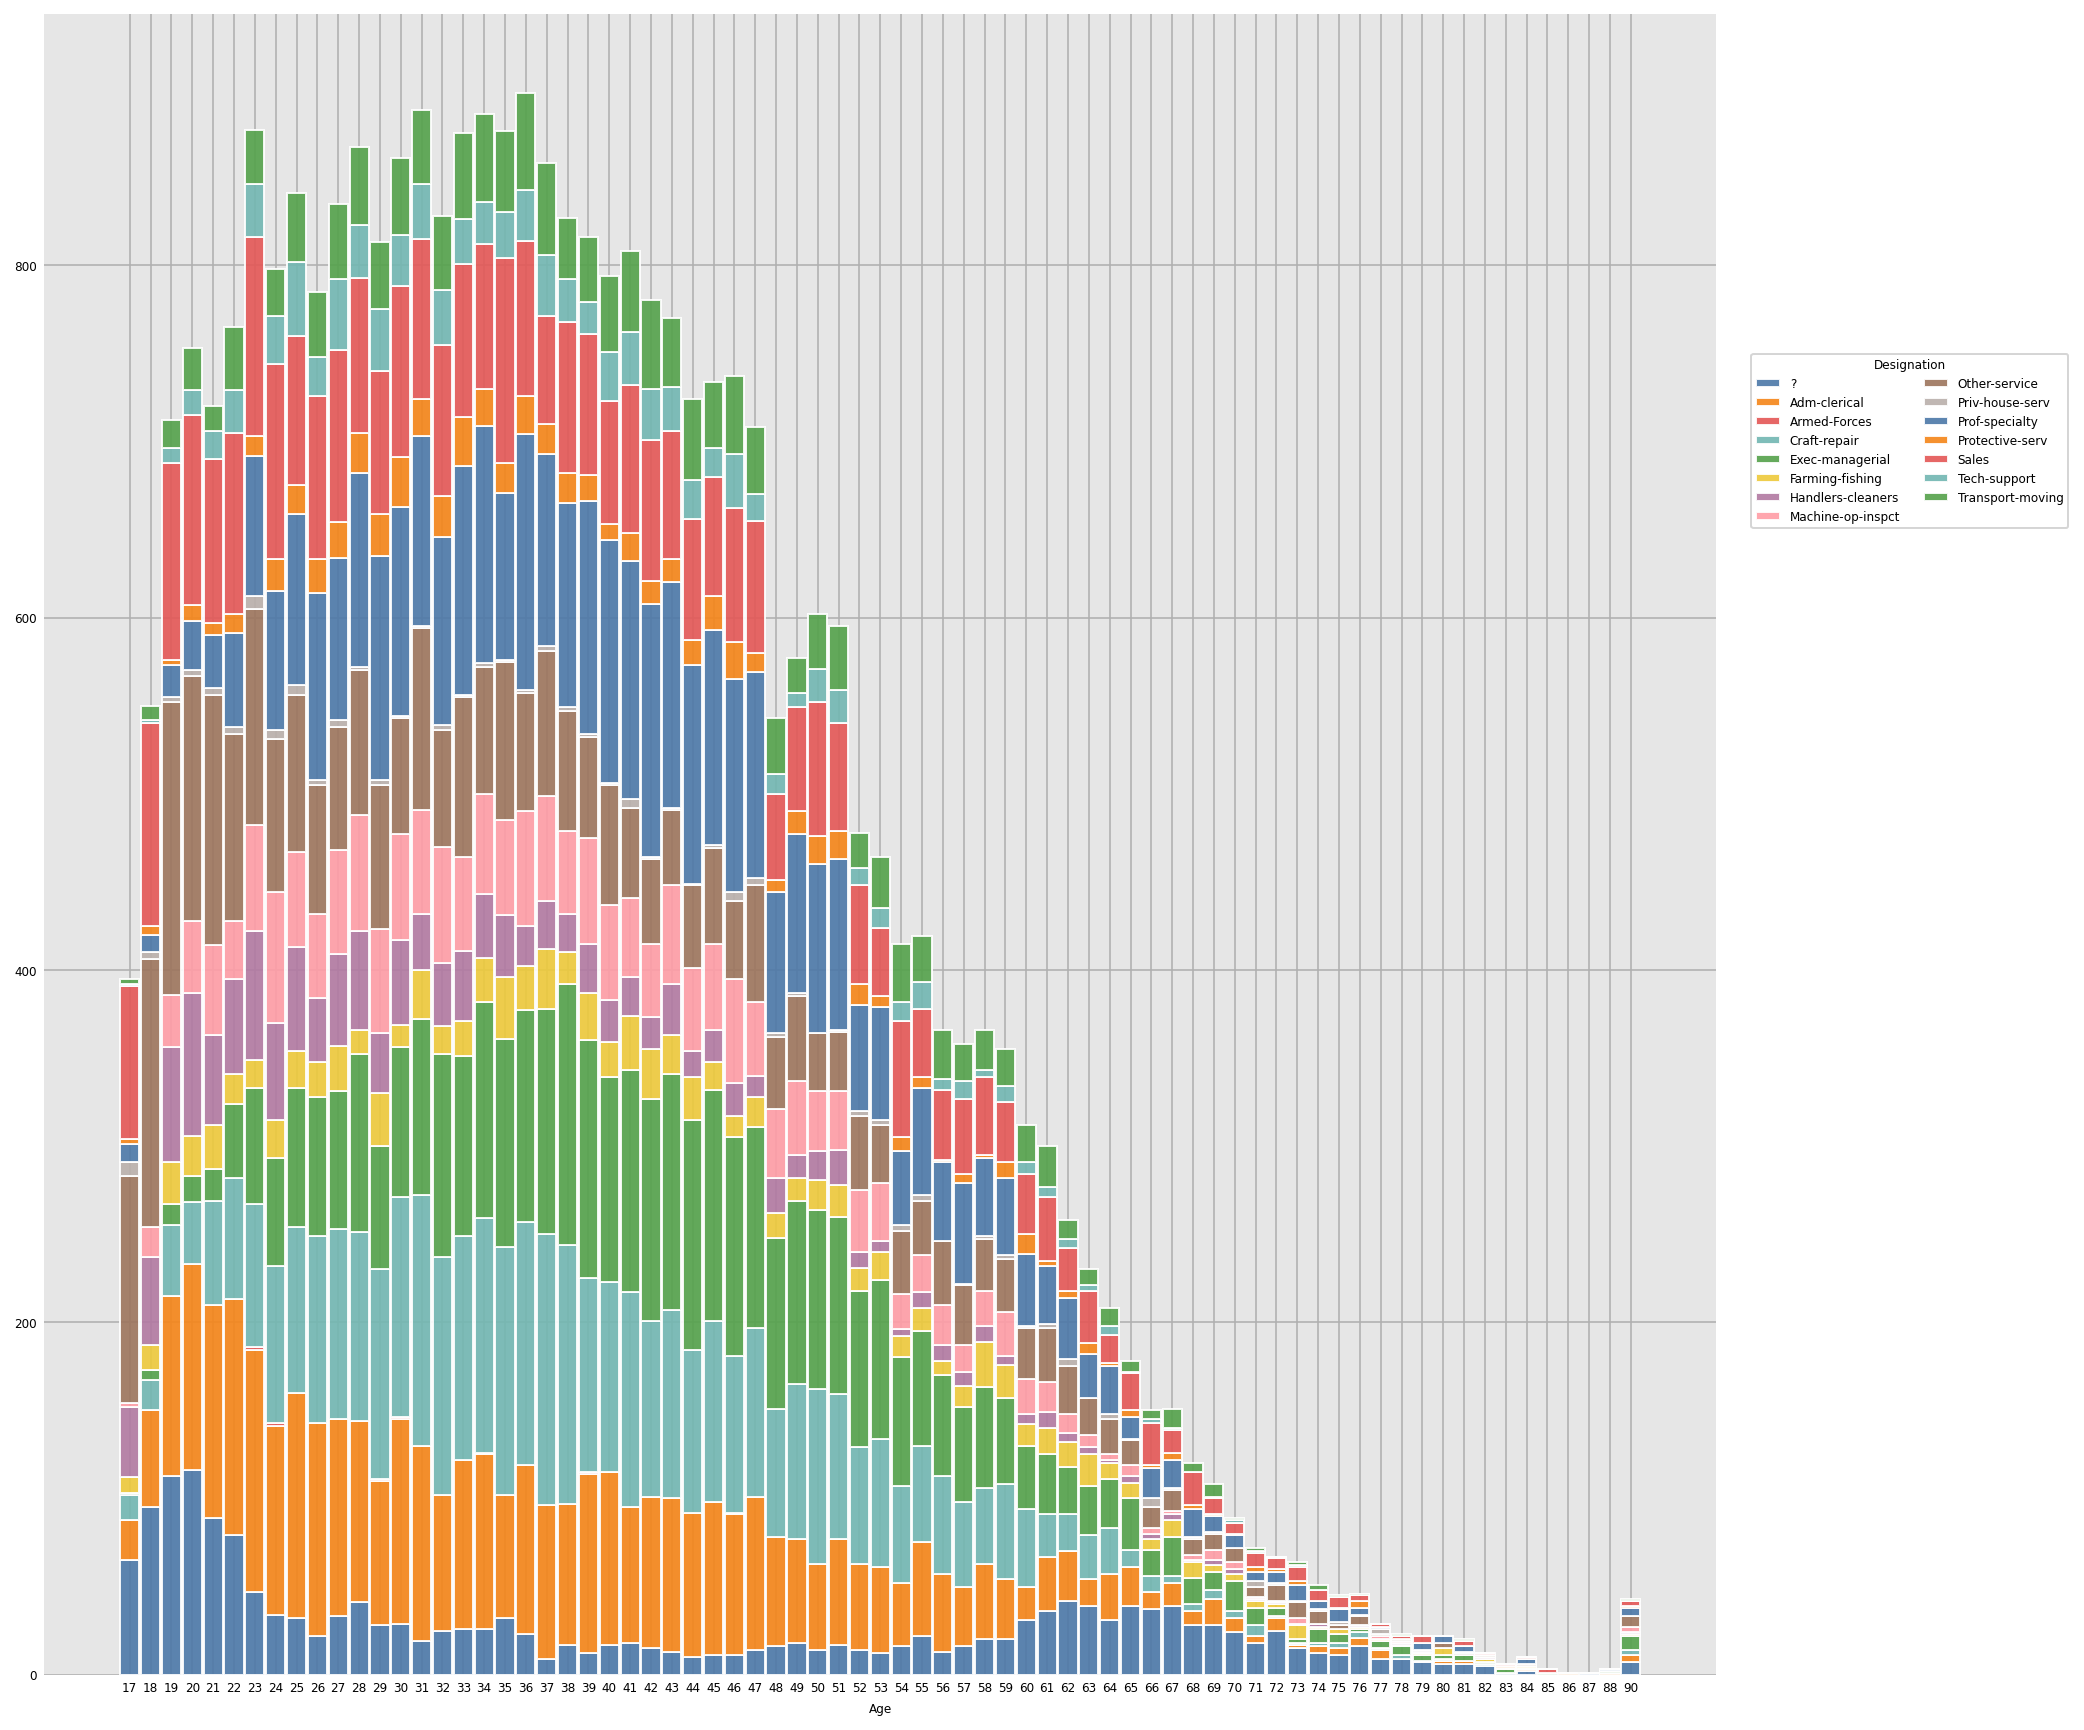

In [ ]:
dxp.count(val="Age",data = data,split="Designation",stacked = True,figsize=(12,12),xlabel = "Age of the Working Class People")

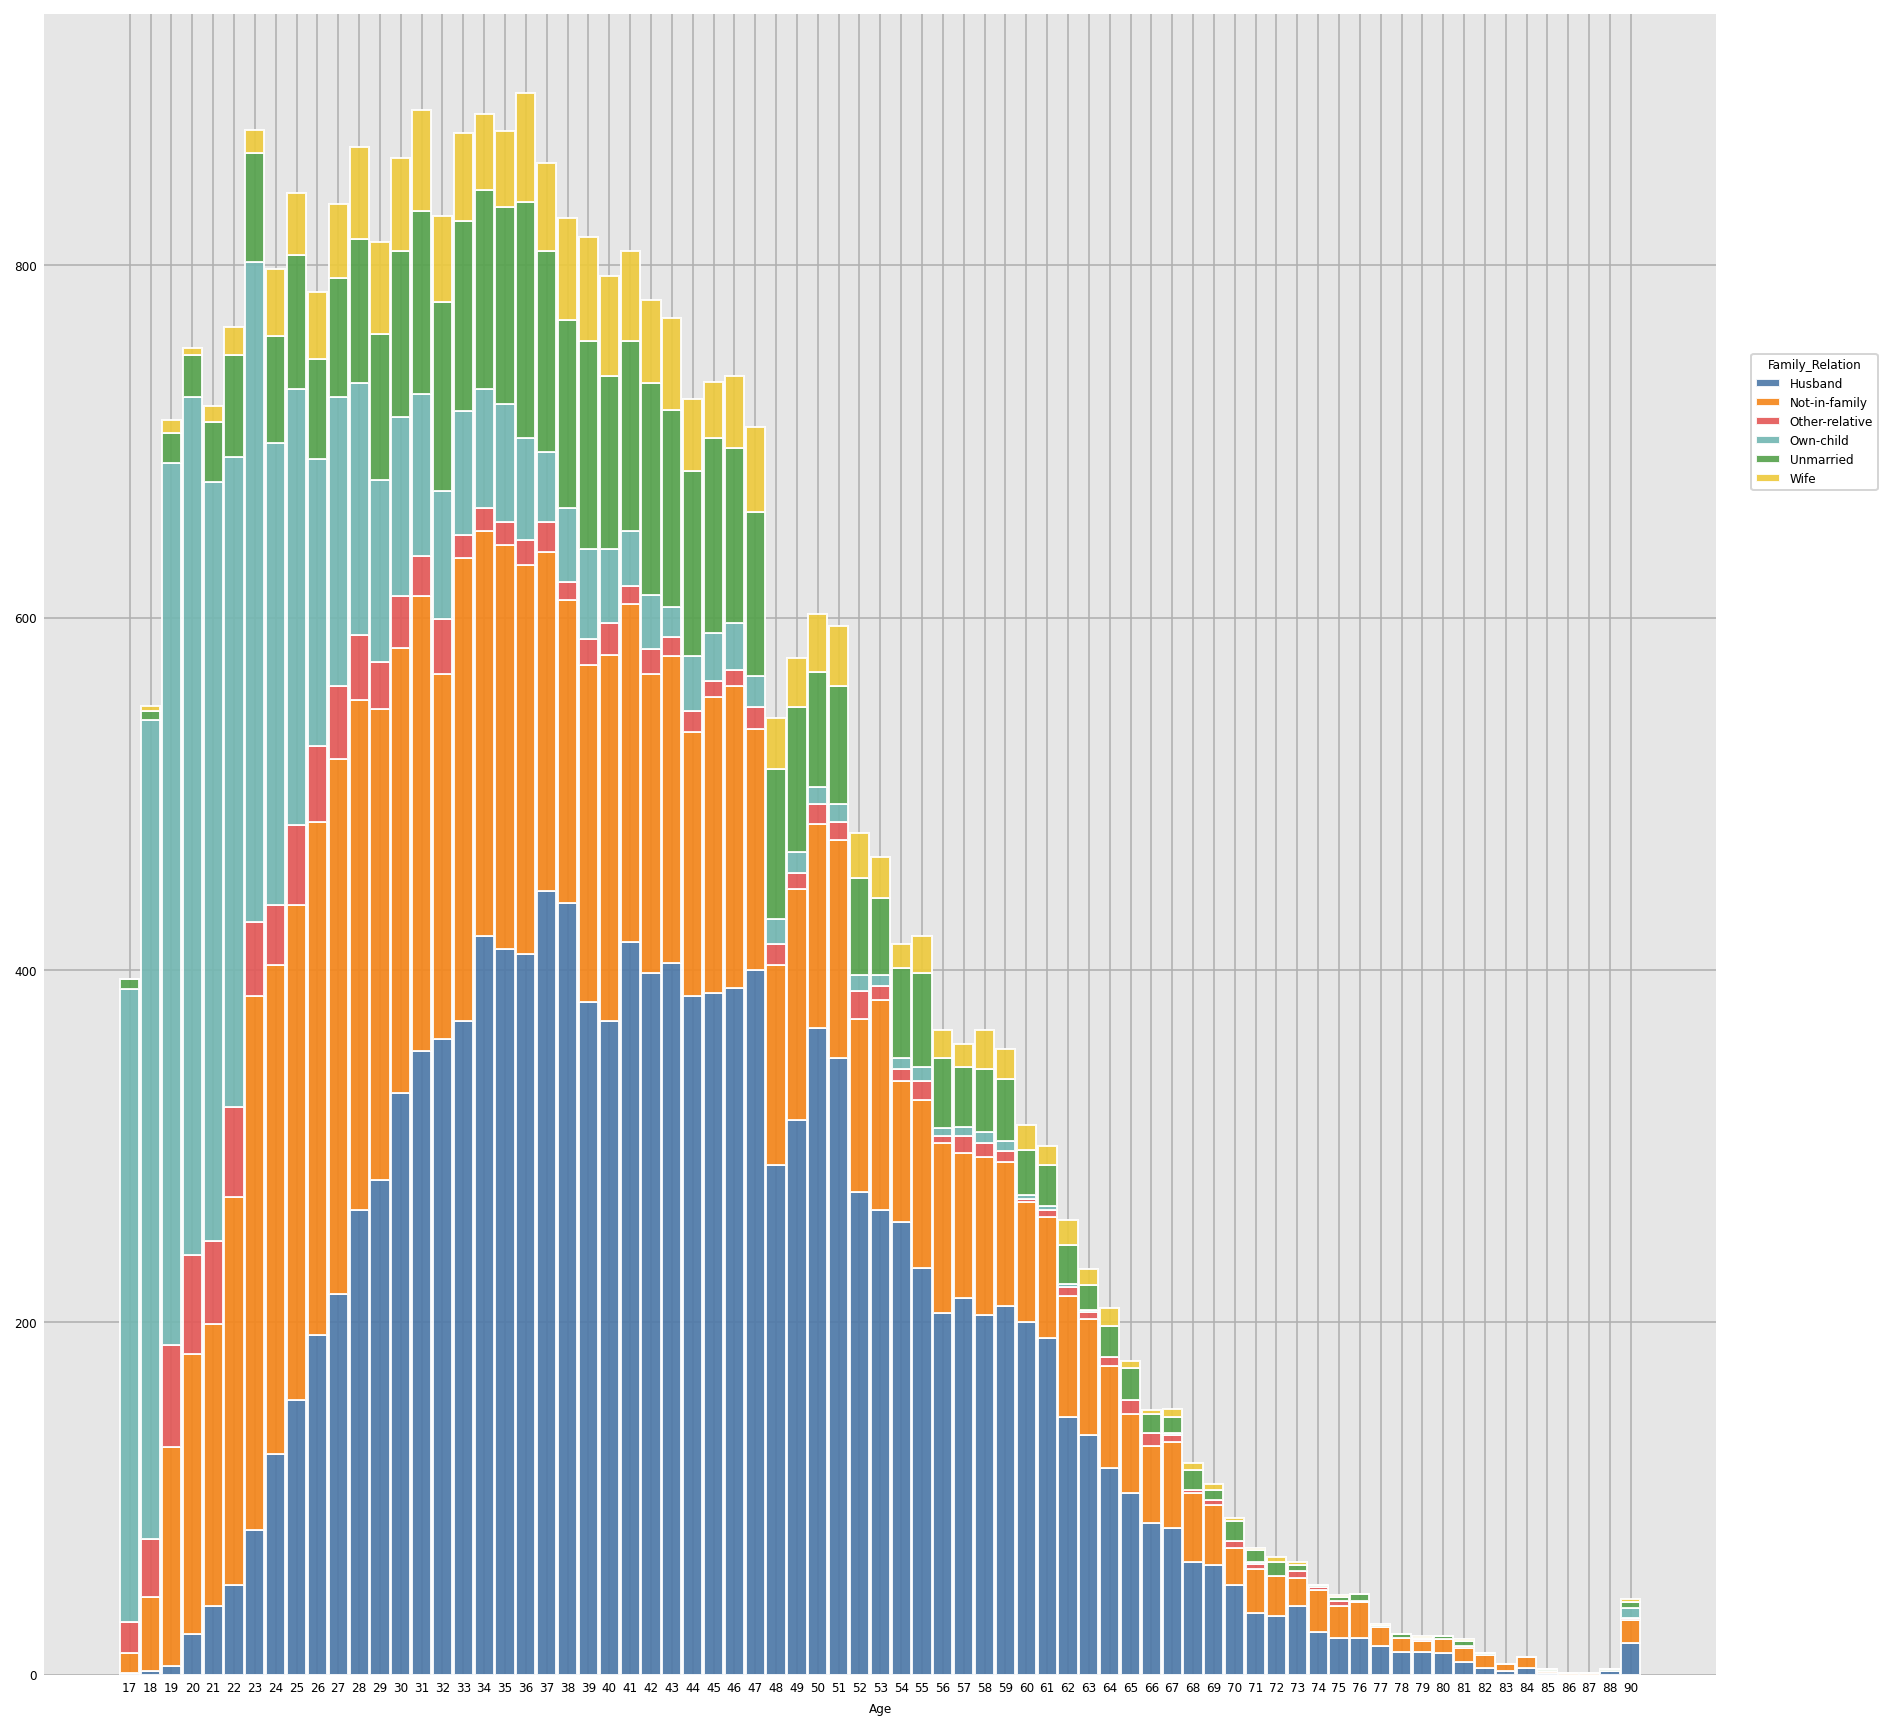

In [ ]:
dxp.count(val="Age",data = data,split="Family_Relation",stacked = True,figsize=(12,12),xlabel = "Age of the Working Class People")

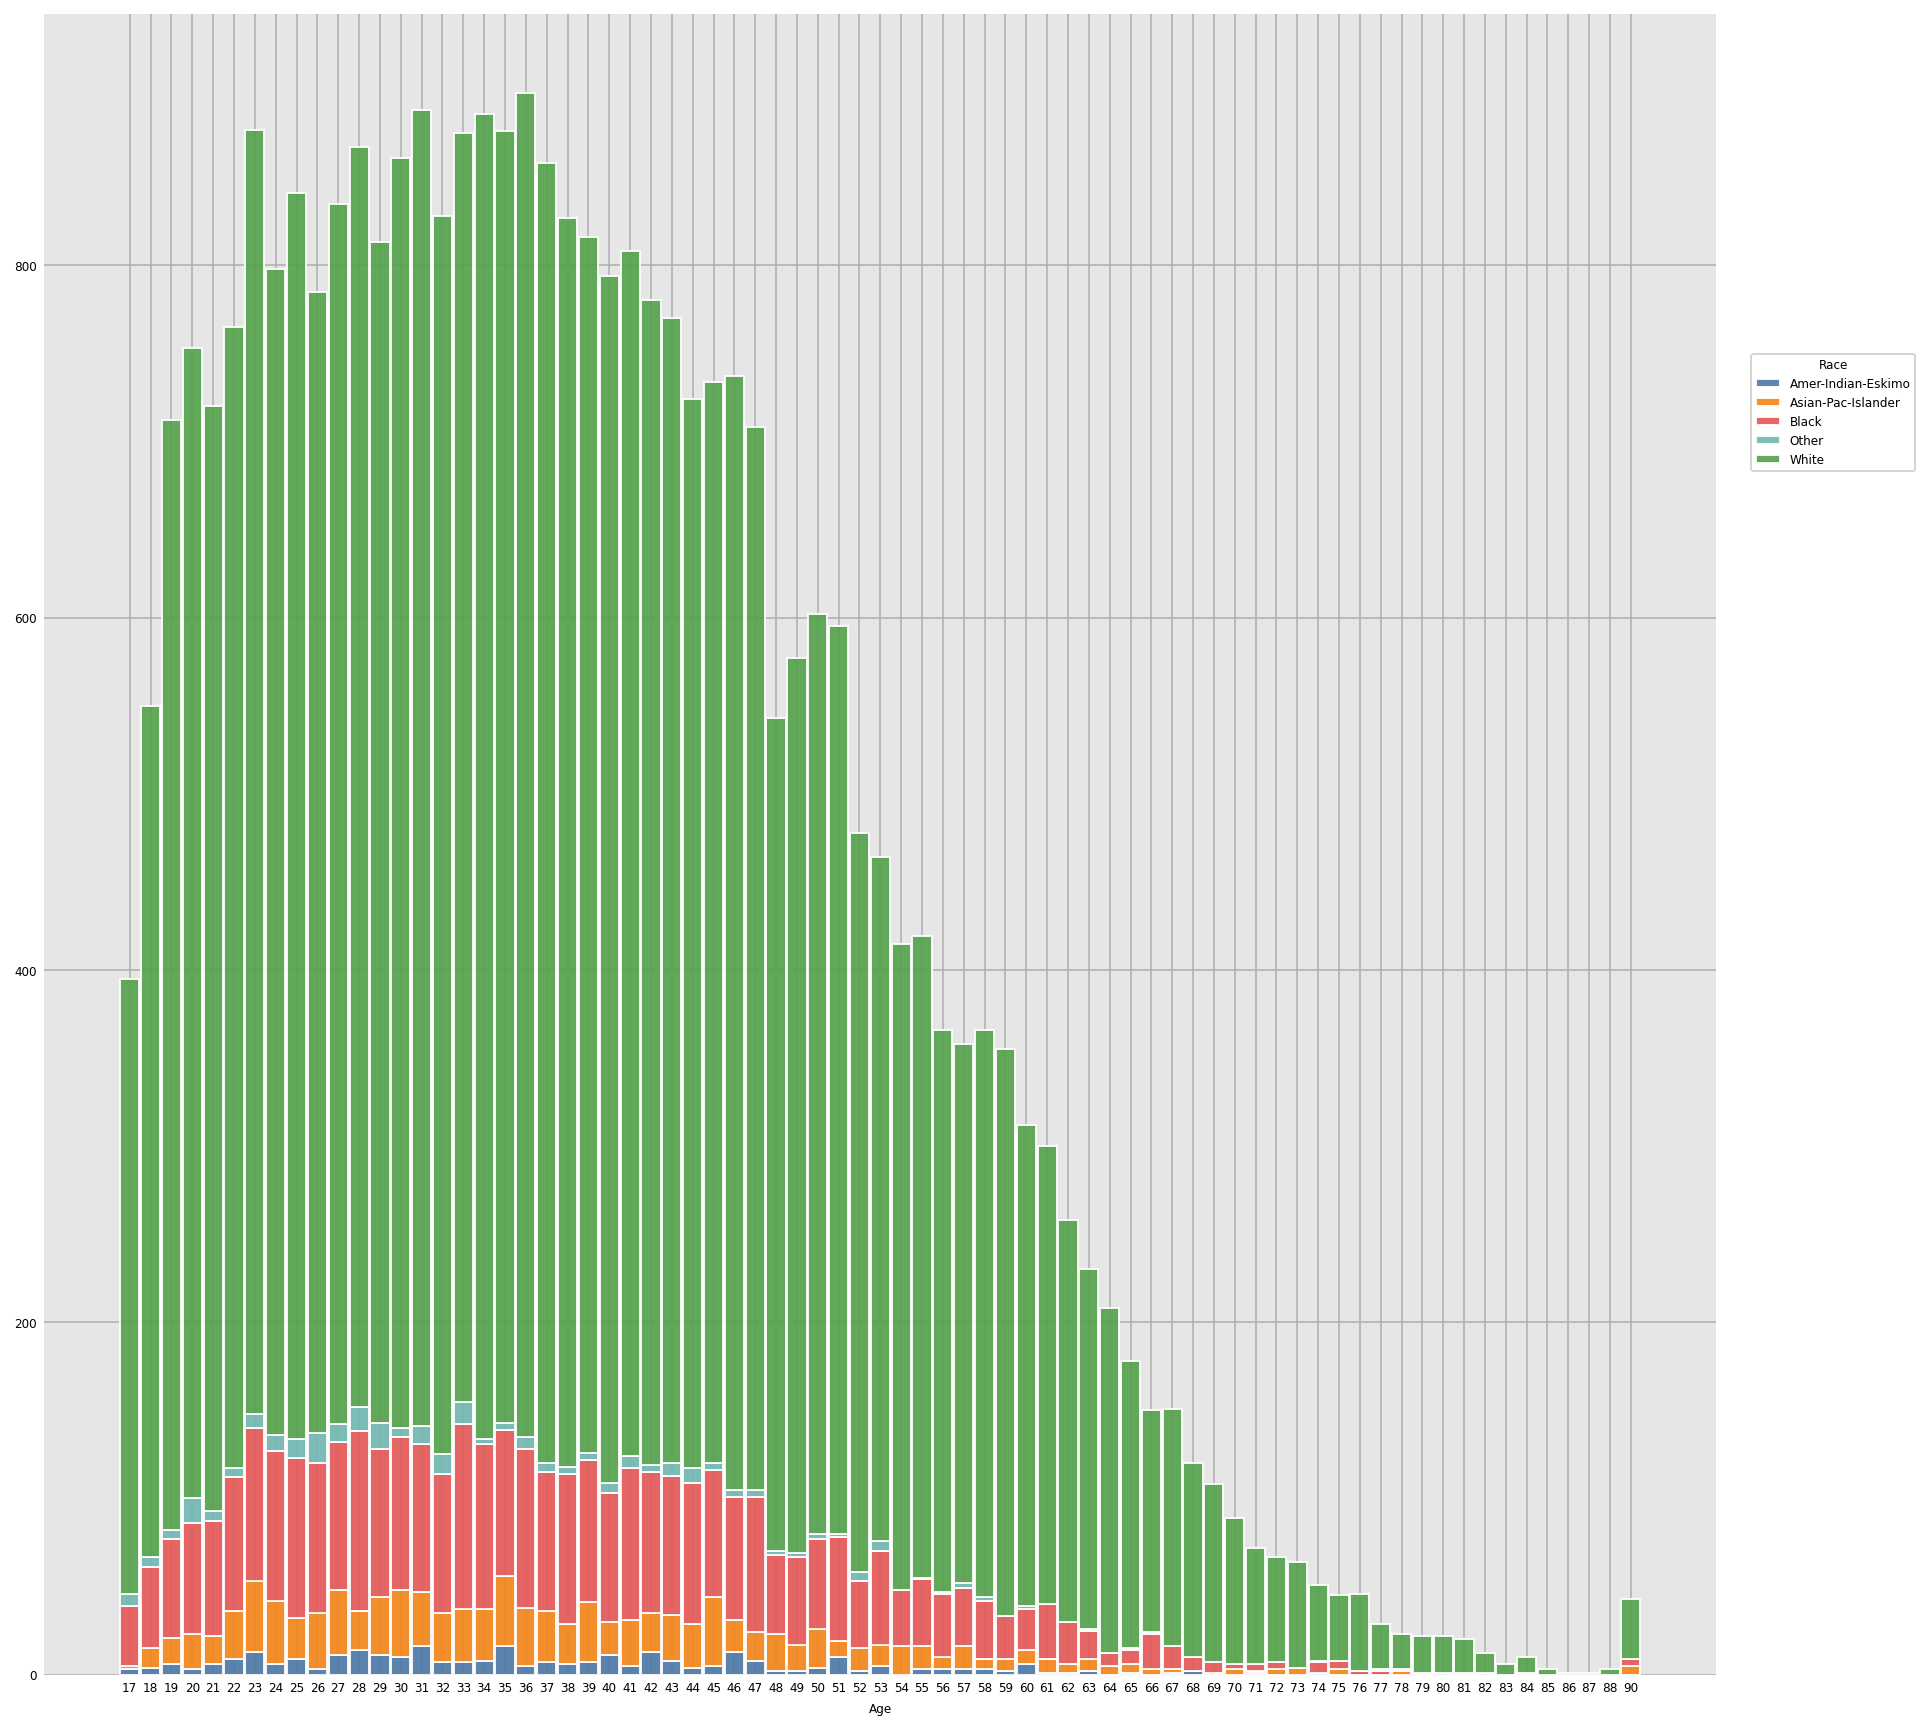

In [ ]:
dxp.count(val="Age",data = data,split="Race",stacked = True,figsize=(12,12),xlabel = "Age of the Working Class People")

In [ ]:
x=data.drop(["Age","Id","Salary","Country","Family_Relation"],axis=1)
y=data.Salary

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((26048, 10), (26048,), (6513, 10), (6513,))

In [ ]:
x_train.head()

Owner_Type     Education  ...  Capital_Loss Working_hours
5514     Private       HS-grad  ...             0            25
19777    Private       HS-grad  ...             0            35
10781    Private     Bachelors  ...             0            40
32240  State-gov  Some-college  ...             0            20
9876   Local-gov     Bachelors  ...             0            40

[5 rows x 10 columns]

In [ ]:
encoder=ce.OrdinalEncoder(cols=["Education","Owner_Type","Gender","Marital_Status","Designation","Race","No_projects"])
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

In [ ]:
x_train.head()

Owner_Type  Education  ...  Capital_Loss  Working_hours
5514            1          1  ...             0             25
19777           1          1  ...             0             35
10781           1          2  ...             0             40
32240           2          3  ...             0             20
9876            3          2  ...             0             40

[5 rows x 10 columns]

In [ ]:
x_test.head()

Owner_Type  Education  ...  Capital_Loss  Working_hours
14160           1          3  ...             0             40
27048           1          3  ...             0             15
28868           1          3  ...             0             40
5667            1          4  ...             0             45
7827            1          3  ...             0             30

[5 rows x 10 columns]

In [ ]:
x_test.head()

Owner_Type  Education  ...  Capital_Loss  Working_hours
14160           1          3  ...             0             40
27048           1          3  ...             0             15
28868           1          3  ...             0             40
5667            1          4  ...             0             45
7827            1          3  ...             0             30

[5 rows x 10 columns]

In [ ]:
y_test.head()

14160    <=50K
27048    <=50K
28868    <=50K
5667     <=50K
7827     <=50K
Name: Salary, dtype: object

In [ ]:
clf_de=DecisionTreeClassifier().fit(x_train,y_train)
pred_de=clf_de.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred_de))
print(accuracy_score(y_test,pred_de))
print(classification_report(y_test,pred_de))

[[4554  422]
 [ 671  866]]
0.8321817902656226
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4976
        >50K       0.67      0.56      0.61      1537

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.83      6513



In [ ]:
clf_re=RandomForestClassifier().fit(x_train,y_train)
pred_re=clf_re.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred_re))
print(accuracy_score(y_test,pred_re))
print(classification_report(y_test,pred_re))

[[4618  358]
 [ 635  902]]
0.8475356978350991
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.72      0.59      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



In [ ]:
clf_kn=KNeighborsClassifier().fit(x_train,y_train)
pred_kn=clf_kn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred_kn))
print(accuracy_score(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

[[4578  398]
 [ 628  909]]
0.8424689083371718
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4976
        >50K       0.70      0.59      0.64      1537

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [ ]:
import joblib
file="random_forest.sav"
joblib.dump(clf_re,file)

['random_forest.sav']

In [ ]:
file1="kn.sav"
joblib.dump(clf_kn,file1)

['kn.sav']

In [ ]:
loaded_model=joblib.load(file)
result=loaded_model.score(x_test,y_test)
print(result)

0.8475356978350991


In [ ]:
loaded_model=joblib.load(file1)
result=loaded_model.score(x_test,y_test)
print(result)

0.8424689083371718
